In [1]:
# Import all packages required:
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import swirl

# For reproducibiliy set a seed:
np.random.seed(123)

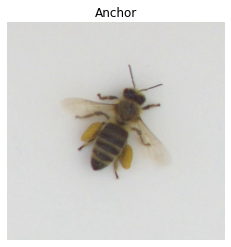

In [2]:
# Read in the image and crop it around the center:
img = plt.imread("/Users/Florian-Kuhm/Documents/bee_images/bee_000002/sequence_000001/image_000000.png")
plt.figure()
plt.imshow(img)
plt.axis('off')
plt.title("Anchor")
plt.show()


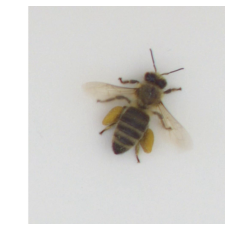

Pixelwise distance of 0.017507


In [3]:
shifted_img = np.ones_like(img)
num_pixel_shifted = 50
shifted_img[:, num_pixel_shifted:, :] = img[0:(img.shape[0]), 0:(img.shape[1]-num_pixel_shifted) ,:]

plt.figure()
plt.imshow(shifted_img)
plt.axis('off')
plt.show()

print("Pixelwise distance of %f"%np.mean((shifted_img[50:,50:,:]-img[50:,50:,:])**2))

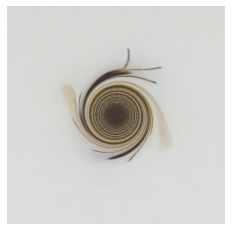

Pixelwise distance of 0.006958


In [4]:
# Swirl the image, plot it and calculate the pixelwise distance:
swirled_image = swirl(img, rotation=0, strength=200, radius=120)

plt.figure()
plt.imshow(swirled_image)
plt.axis('off')
plt.show()

print("Pixelwise distance of %f"%np.mean((swirled_image-img)**2))

In [5]:
import torch
from torch import nn

# Load model:
model = torch.hub.load('pytorch/vision:v0.10.0', 'inception_v3', pretrained=True)
model.eval()
# Remove fully connected layer:
model.fc = nn.Identity()

print(model)

Using cache found in /Users/Florian-Kuhm/.cache/torch/hub/pytorch_vision_v0.10.0


Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [6]:
# Calculation of the feature vector of the anchor image:
feature_vec_img = model(torch.from_numpy(img).permute(2,0,1).unsqueeze(dim = 0)).detach().numpy()
feature_vec_shifted_img = model(torch.from_numpy(shifted_img).permute(2,0,1).unsqueeze(dim = 0)).detach().numpy()
feature_vec_swirled_img = model(torch.from_numpy(swirled_image).permute(2,0,1).unsqueeze(dim = 0)).detach().numpy()


<IPython.core.display.Javascript object>


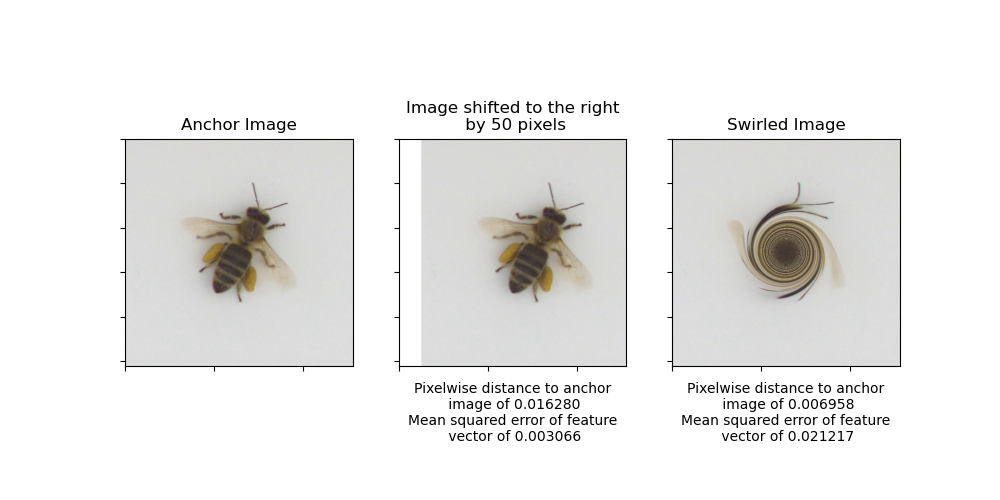

In [8]:
####################################
# Display all results in one plot:
####################################

%matplotlib notebook
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,3,1)
ax.imshow(img)
#ax.axis('off')
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.title("Anchor Image")
ax = fig.add_subplot(1,3,2)
ax.imshow(shifted_img)
#ax.axis('off')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xlabel(f"Pixelwise distance to anchor\n image of %f\nMean squared error of feature\n vector of %f"%(\
    np.mean((shifted_img-img)**2), np.mean((feature_vec_shifted_img-feature_vec_img)**2)))
plt.title("Image shifted to the right\n by 50 pixels")
ax = fig.add_subplot(1,3,3)
ax.imshow(swirled_image)
ax.set_xlabel(f"Pixelwise distance to anchor\n image of %f\nMean squared error of feature\n vector of %f"%(\
    np.mean((swirled_image-img)**2), np.mean((feature_vec_swirled_img-feature_vec_img)**2)))
#ax.axis('off')
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.title("Swirled Image")
plt.show()

fig.savefig("/Users/Florian-Kuhm/Desktop/comparisonPixelwiseLoss.png")
